## Context-Free Grammar（CFG）

In [12]:
import nltk, os, jieba
from nltk.tree import Tree
from nltk.draw import TreeWidget
from nltk.draw.tree import TreeView
from nltk.draw.util import CanvasFrame
from nltk.parse import RecursiveDescentParser


class Cfg():
    '''
    使用nltk解析语法树
    '''
    def test_sample(self):
        print("test_sample")
        # This is a CFG grammar, where:
        # Start Symbol : S
        # Nonterminal : NP,VP,DT,NN,VB
        # Terminal : "I", "a" ,"saw" ,"dog"
        grammar = nltk.grammar.CFG.fromstring("""
            S -> NP VP
            NP -> DT NN | NN
            VP -> VB NP
            DT -> "a"
            NN -> "I" | "dog"
            VB -> "saw"
        """)
        sentence = "I saw a dog".split()
        parser = RecursiveDescentParser(grammar)
        final_tree = parser.parse(sentence)
        for i in final_tree:
            print(i)

    def cfg_en(self):
        print("test_nltk_cfg_en")
        # 定义规则
        grammar = nltk.CFG.fromstring("""
         S -> NP VP
         VP -> V NP | V NP PP
         V -> "saw" | "ate"
         NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
         Det -> "a" | "an" | "the" | "my"
         N -> "dog" | "cat" | "cookie" | "park"
         PP -> P NP
         P -> "in" | "on" | "by" | "with"
         """)

        sent = "Mary saw Bob".split()
        rd_parser = RecursiveDescentParser(grammar)

        result = []
        for i, tree in enumerate(rd_parser.parse(sent)):
            result.append(tree)

        assert len(result) > 0, " CFG tree parse fail."
        print(result)

    def cfg_zh(self):
        print("test_nltk_cfg_zh")
        # 定义规则
        grammar = nltk.CFG.fromstring("""
             S -> N VP
             VP -> V NP | V NP | V N
             V -> "尊敬"
             N -> "我们" | "老师" 
             """)
        
        sent = "我们 尊敬 老师".split()
        rd_parser = RecursiveDescentParser(grammar)

        result = []
        for i, tree in enumerate(rd_parser.parse(sent)):
            result.append(tree)
            print("Tree [%s]: %s" % (i + 1, tree))

        assert len(result) > 0, "Can not recognize CFG tree."
        if len(result) == 1:
            print("Draw tree with Display ...")
            result[0].draw()
        else:
            print("WARN: Get more then one trees.")

        print(result)


if __name__ == '__main__':
    cfg = Cfg()
    cfg.cfg_en()
    cfg.cfg_zh()

test_nltk_cfg_en
[Tree('S', [Tree('NP', ['Mary']), Tree('VP', [Tree('V', ['saw']), Tree('NP', ['Bob'])])])]
test_nltk_cfg_zh
Tree [1]: (S (N 我们) (VP (V 尊敬) (N 老师)))
Draw tree with Display ...
[Tree('S', [Tree('N', ['我们']), Tree('VP', [Tree('V', ['尊敬']), Tree('N', ['老师'])])])]


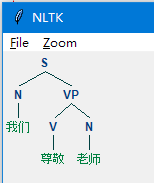